# Setup

## Imports

In [47]:
from helpers import displayAsDF, pie, pie_maker, whiteFig
from json import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Variables

In [48]:
salaries = pd.read_csv("salaries_processed.csv", index_col=0)
with open("../mappers.json", "r") as f:
  mappers = load(f)

## Helpers

In [49]:
reverseMapper = lambda mapper: dict((v,k) for k,v in mapper.items())

conditionalBoxplot = lambda df, x, y: df[[x, y]].boxplot(x, y, figsize=(6,)*2)

# Exploration

## Insight 1: Most employees live in the same country as their company

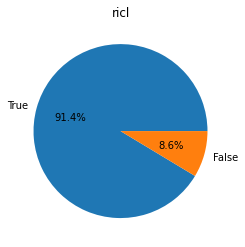

In [50]:
salaries[["ricl"]].apply(pie_maker(1))
plt.show()

### Potential Reason: Employers pay higher to those living in the same country

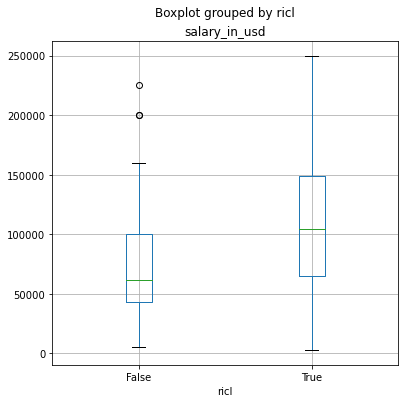

In [53]:
conditionalBoxplot(salaries, "salary_in_usd", "ricl")
plt.show()

## Insight 2:	Most jobs come from North America



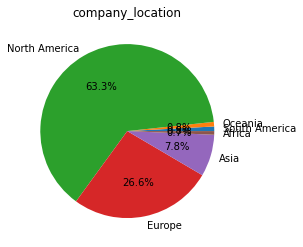

In [54]:
company_location = salaries[["company_location"]].replace(reverseMapper(mappers["company_location"]))
company_location.apply(pie_maker(1))
plt.show()

### The job count stays consistent even after dividing by population

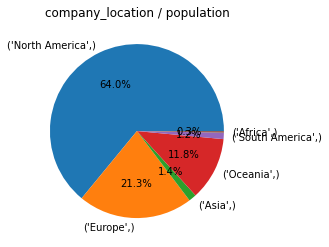

In [62]:
cl_vcs = company_location.value_counts()
cl_vcs["Asia"] /= 3261050390
cl_vcs["Africa"] /= 1340598147
cl_vcs["Europe"] /= 747636026
cl_vcs["North America"] /= 592072212
cl_vcs["South America"] /= 430759766
cl_vcs["Oceania"] /= 43111704

whiteFig()
plt.title("company_location / population")
pie(plt, cl_vcs)
plt.show()

## Insight 3: `salary_in_usd` increased together with `work_year`

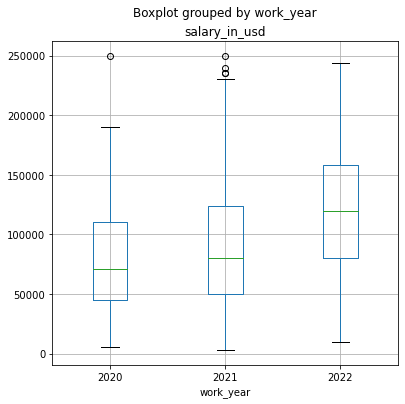

In [52]:
conditionalBoxplot(salaries, "salary_in_usd", "work_year")
plt.show()

### Does this simply counter Inflation Rate (IR), or is there a true increase?

2020's IR: 1.4%
2021's IR: 7%
(Trading Economics, n.d.)

Referring to the above, there is generally a true year-on-year increase in salary. It seems that Data Science Jobs are getting paid more.

In [71]:
salary = salaries["salary_in_usd"]
wy = salaries["work_year"]

pct = lambda y1, y2: f"{y1} to {y2}: {np.round(salary[wy == y2].mean() / salary[wy == y1].mean() - 1, 2)*100}%"
print(pct(2020, 2021))
print(pct(2021, 2022))

2020 to 2021: 13.0%
2021 to 2022: 34.0%
